In [39]:
# conda install -c plotly plotly
pip install plotly

SyntaxError: invalid syntax (3272799531.py, line 2)

In [46]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import plotly.express as px 

import seaborn as sns

palette = sns.color_palette("rainbow",8)

In [41]:
#Read the dataset
df = pd.read_csv("./Data/layoffs_data.csv")
df.head().style.set_properties(**{'background-color': '#E1F8FF','color': '#000','border': '1px solid #4AD3FF'})

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.000000,2023-06-23,https://www.theinformation.com/articles/social-app-irl-which-raised-200-million-shuts-down-after-ceo-misconduct-probe,197.000000,Series C,2023-06-25 23:04:16,United States,nan,Unknown
1,Retool,SF Bay Area,Other,0.090000,2023-06-22,Internal memo,141.000000,Series C,2023-06-22 14:23:40,United States,nan,Unknown
2,Anaplan,SF Bay Area,Other,nan,2023-06-21,https://nypost.com/2023/06/23/software-giant-anaplan-begins-layoffs-after-thoma-bravos-10-4b-buyout-deal/,300.000000,Acquired,2023-06-24 03:48:00,United States,300.000000,Unknown
3,Uber,SF Bay Area,Transportation,nan,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-off-200-employees-in-recruitment-division,25200.000000,Post-IPO,2023-06-22 00:19:03,United States,200.000000,Unknown
4,Tackle.io,Boise,Infrastructure,nan,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.000000,Series C,2023-06-23 15:38:59,United States,75.000000,Unknown


In [8]:
#Data Exploration
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2738 non-null   object 
 1   Location_HQ                 2738 non-null   object 
 2   Industry                    2738 non-null   object 
 3   Percentage                  1819 non-null   float64
 4   Date                        2738 non-null   object 
 5   Source                      2738 non-null   object 
 6   Funds_Raised                2466 non-null   float64
 7   Stage                       2738 non-null   object 
 8   Date_Added                  2738 non-null   object 
 9   Country                     2738 non-null   object 
 10  Laid_Off_Count              1871 non-null   float64
 11  List_of_Employees_Laid_Off  2737 non-null   object 
dtypes: float64(3), object(9)
memory usage: 256.8+ KB


Company                         0
Location_HQ                     0
Industry                        0
Percentage                    919
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [9]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1819.000000,2466.000000,1871.000000
mean,0.265282,805.994118,252.405665
std,0.265125,5295.209903,818.989438
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


In [10]:
#Create new column 'year_of_laidoff' tell us which layoff happend
def get_date():
    year_list = []
    
    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
    return year_list 

layoff_year_list = get_date()

df['year_of_laidOff']= layoff_year_list

In [11]:
#Data Cleaning
#Remove source 
df.drop(['Source','Date_Added','List_of_Employees_Laid_Off'], axis=1, inplace=True)

In [14]:
df=df[df['Laid_Off_Count'].notna()]
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,300.0,Acquired,United States,300.0,2023
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,25200.0,Post-IPO,United States,200.0,2023
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,148.0,Series C,United States,75.0,2023
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,2023
7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,2023


In [17]:
#Analysis
#Q1: Did the recent layoffs primarily affect the US and not other countries? 
laidOff_countByCountry = df.groupby('Country', as_index =False).sum()
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

C:\Users\cangn\AppData\Local\Temp\ipykernel_13128\124018293.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countByCountry = df.groupby('Country', as_index =False).sum()


In [18]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

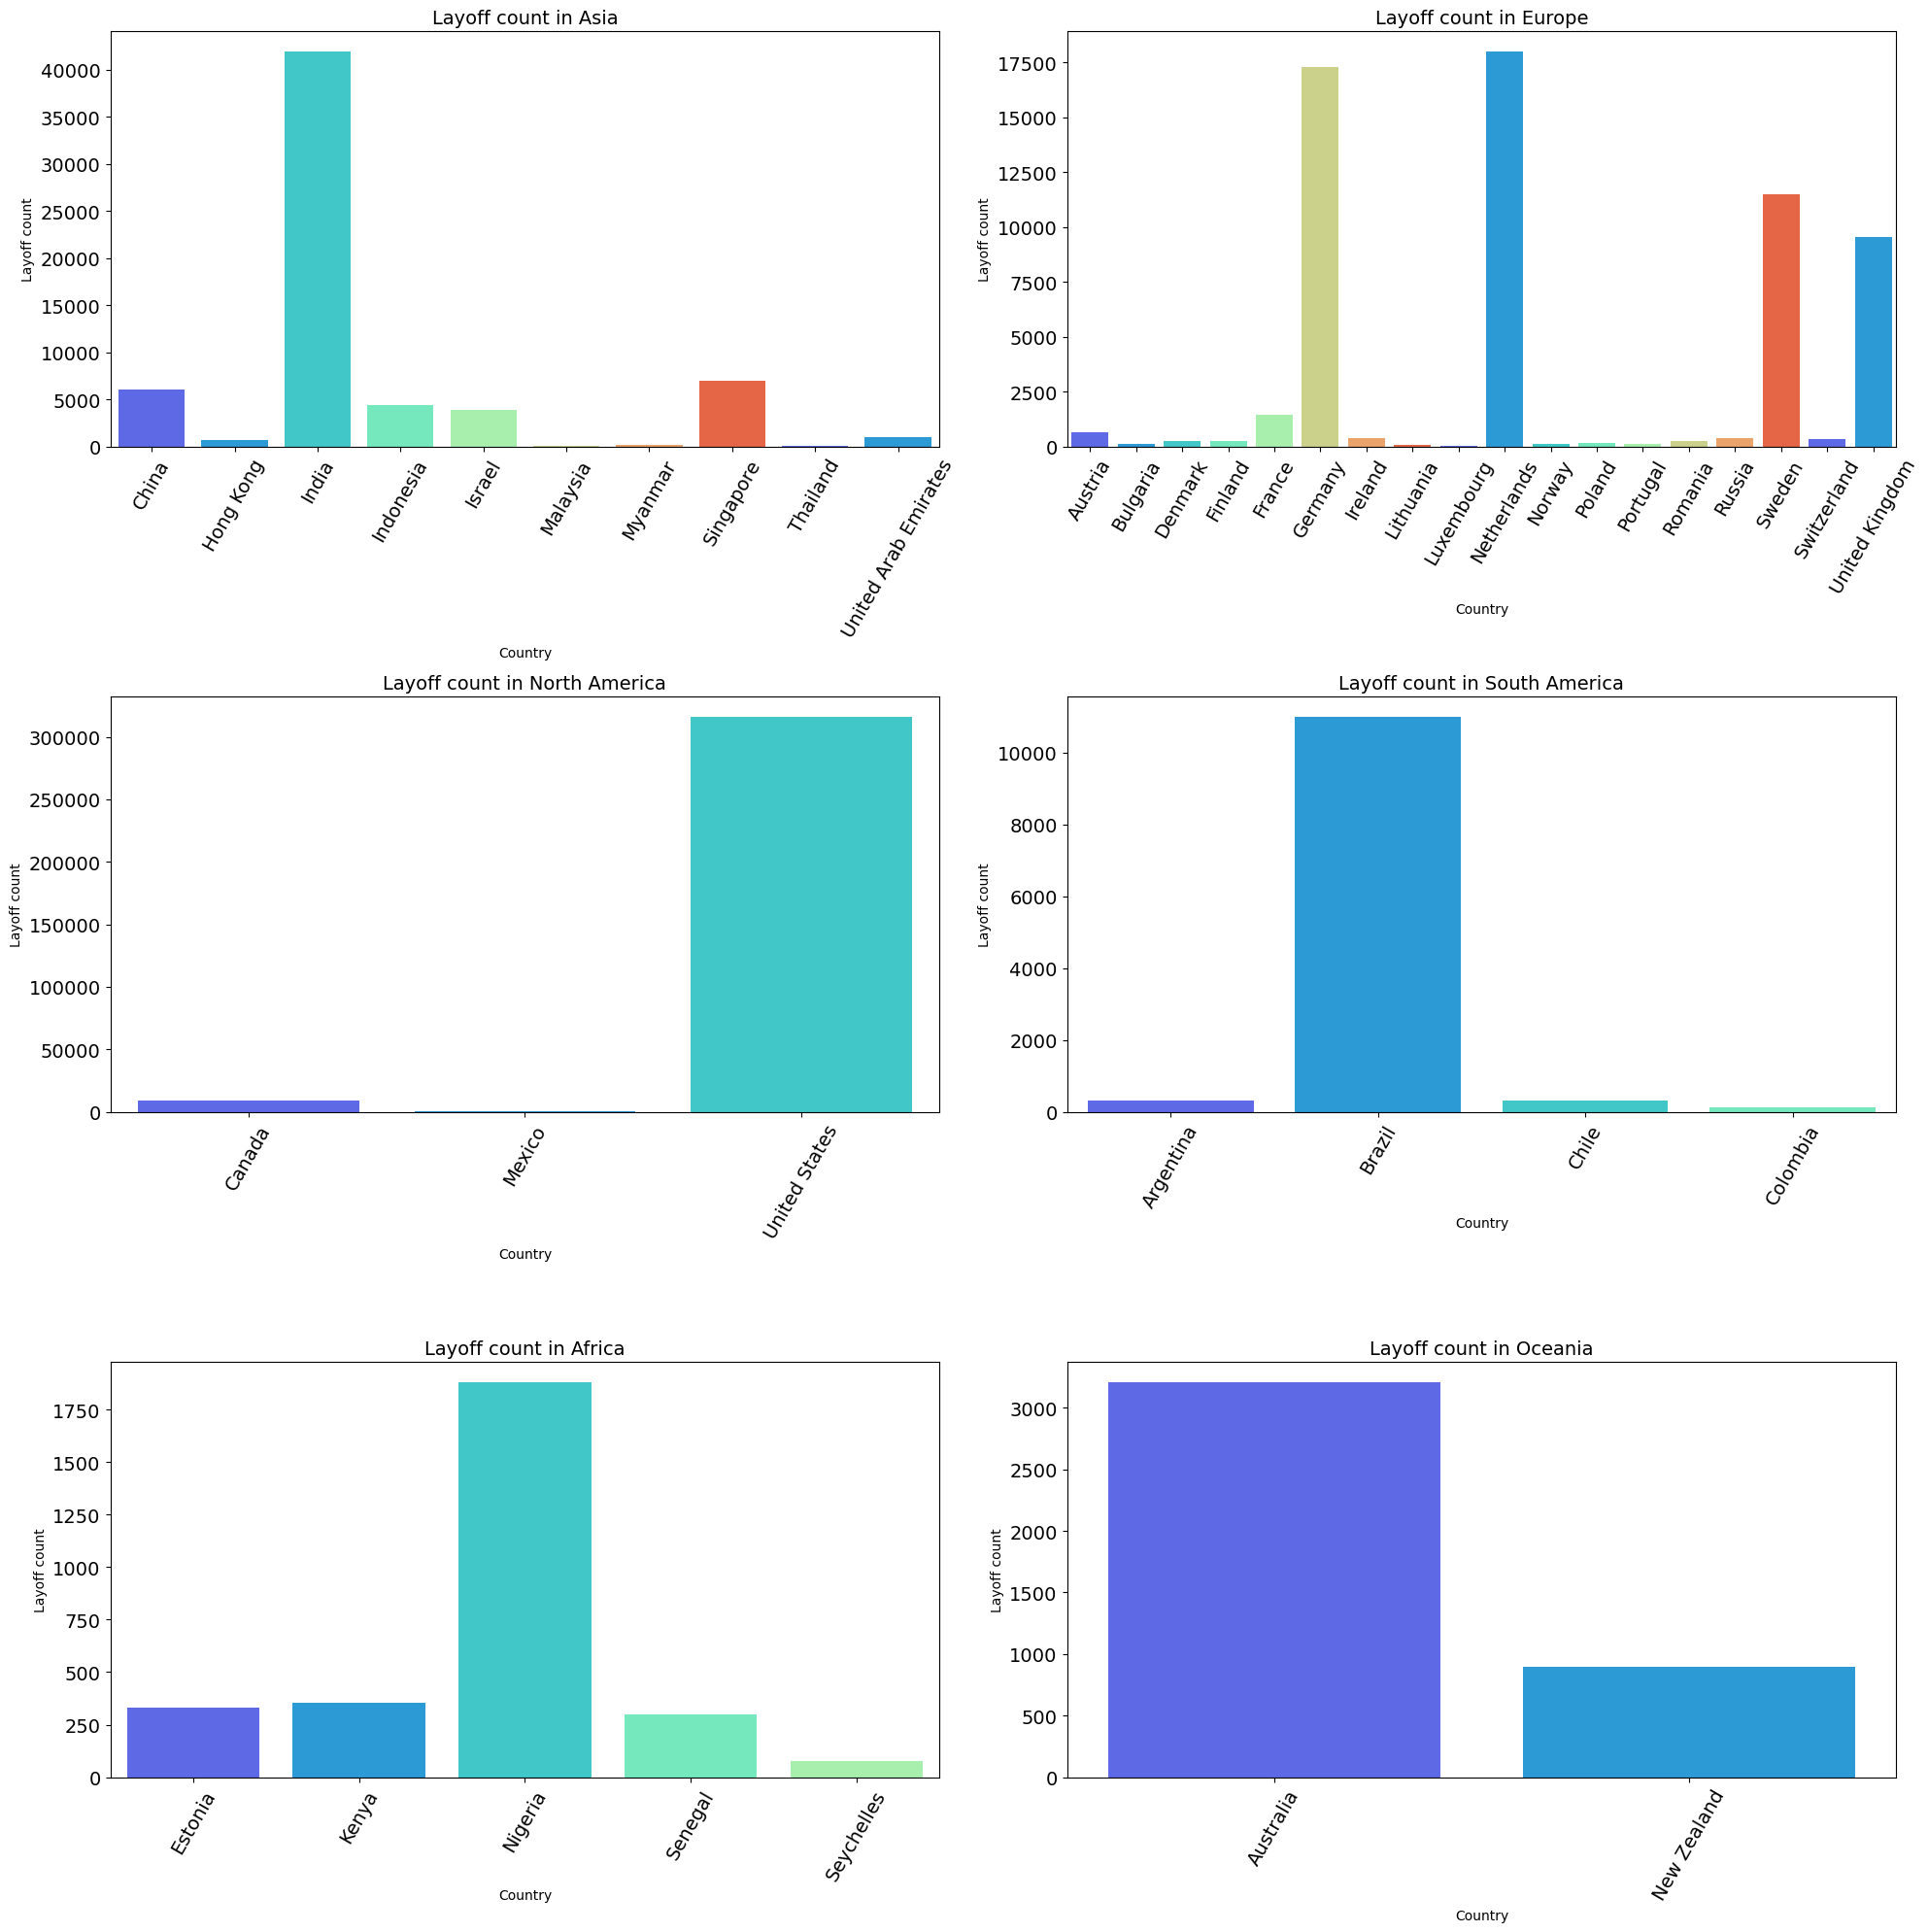

In [47]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()